In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from BaselineModel import Baseline_mb
from MasterModel import MasterModel
from functions.get_min_max_dict import get_min_max_dict
from functions.data_gather import data_gather
from functions.get_dataset import get_dataset
from visualization.compare_plot import plot_results
max_count=100


In [2]:
ds_path_baseline = 'data/test_cv'
ds_path_master = 'data/master_cv'

In [3]:
# @title Load Test Dataset
def normalize(x, labels):
    drop = tf.experimental.numpy.cbrt(labels[2])
    return x, (labels[0],labels[1],drop)

ds_test_baseline = get_dataset(ds_path_baseline)
ds_test_master = get_dataset(ds_path_master).map(normalize)

In [4]:
baseline_model = Baseline_mb()

baseline_model.set_min_max_scores(
    get_min_max_dict(
        tf.data.Dataset.load(f"{ds_path_baseline}/0/training", compression="GZIP"),
        baseline_model.min_max_scores_fields,
    )
)

baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanAbsolutePercentageError(),
)
baseline_model.load_weights(tf.train.latest_checkpoint('ckpt/Baseline_mb/'))

base_original,base_predicted,_ = data_gather(ds_test_baseline,baseline_model,max_count=max_count)

IntProgress(value=0, bar_style='success', description='Loading:')

In [5]:
master_model = MasterModel()

master_model.set_min_max_scores(
    get_min_max_dict(
        tf.data.Dataset.load(f"{ds_path_master}/0/training", compression="GZIP"),
        master_model.min_max_scores_fields,
    )
)

master_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
)
master_model.load_weights(tf.train.latest_checkpoint('ckpt/MasterModel/'))

original,predicted,mean = data_gather(ds_test_master,master_model,max_count=max_count)

IntProgress(value=0, bar_style='success', description='Loading:')

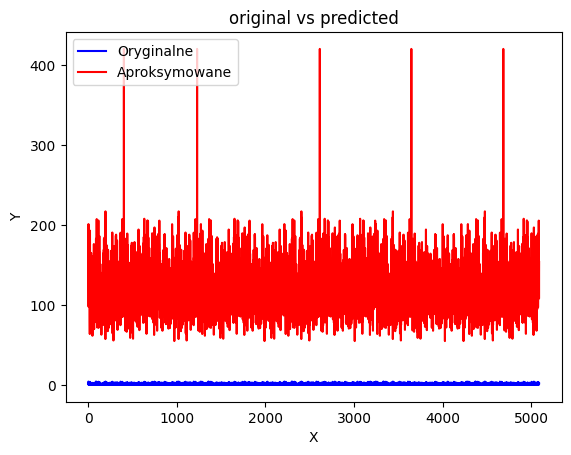

In [6]:
plot_results(base_original[0],base_predicted[0],title='original vs predicted')

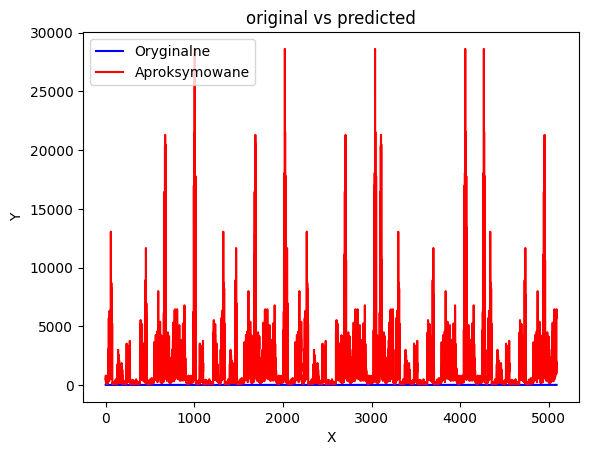

In [10]:
plot_results(original[0],predicted[0],title='original vs predicted')